In [413]:
#Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# sklearn utilities
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score


##### Importing Data and Converting into DataFrame

In [414]:
data = pd.read_csv(os.getcwd() + '/premLeague.csv')
df = pd.DataFrame(data)
df

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HF,AF,HY,AY,HR,AR,HGD,AGD
0,2000-01,8/19/2000 0:00,Charlton,Man City,4,0,H,2,0,H,...,6,6,13,12,1,2,0,0,4,-4
1,2000-01,8/19/2000 0:00,Chelsea,West Ham,4,2,H,1,0,H,...,7,7,19,14,1,2,0,0,2,-2
2,2000-01,8/19/2000 0:00,Coventry,Middlesbrough,1,3,A,1,1,D,...,8,4,15,21,5,3,1,0,-2,2
3,2000-01,8/19/2000 0:00,Derby,Southampton,2,2,D,1,2,A,...,5,8,11,13,1,1,0,0,0,0
4,2000-01,8/19/2000 0:00,Leeds,Everton,2,0,H,2,0,H,...,6,4,21,20,1,3,0,0,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,2019-20,7/26/2020 16:00,Leicester,Man United,0,2,A,0,0,D,...,3,3,12,11,1,4,1,0,-2,2
7596,2019-20,7/26/2020 16:00,Man City,Norwich,5,0,H,2,0,H,...,9,0,7,4,1,1,0,0,5,-5
7597,2019-20,7/26/2020 16:00,Newcastle,Liverpool,1,3,A,1,1,D,...,2,4,11,5,1,0,0,0,-2,2
7598,2019-20,7/26/2020 16:00,Southampton,Sheffield United,3,1,H,0,1,A,...,9,1,9,16,0,1,0,0,2,-2


In [415]:
# Split the dataframe into chunks per season
def split_df(dataframe):
    seasons_chunck_as_dic = {}
    season_list=dataframe['Season'].unique()

    for season in season_list.tolist():
        seasons_chunck_as_dic[season] = dataframe.loc[dataframe['Season']==season]
    
    return seasons_chunck_as_dic, season_list

main_dict, season_list = split_df(df)

main_dict['2019-20']

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HF,AF,HY,AY,HR,AR,HGD,AGD
7220,2019-20,8/9/2019 20:00,Liverpool,Norwich,4,1,H,4,0,H,...,11,2,9,9,0,2,0,0,3,-3
7221,2019-20,8/10/2019 12:30,West Ham,Man City,0,5,A,0,1,A,...,1,1,6,13,2,2,0,0,-5,5
7222,2019-20,8/10/2019 15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,...,3,4,10,19,2,1,0,0,0,0
7223,2019-20,8/10/2019 15:00,Burnley,Southampton,3,0,H,0,0,D,...,2,7,6,12,0,0,0,0,3,-3
7224,2019-20,8/10/2019 15:00,Crystal Palace,Everton,0,0,D,0,0,D,...,6,2,16,14,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,2019-20,7/26/2020 16:00,Leicester,Man United,0,2,A,0,0,D,...,3,3,12,11,1,4,1,0,-2,2
7596,2019-20,7/26/2020 16:00,Man City,Norwich,5,0,H,2,0,H,...,9,0,7,4,1,1,0,0,5,-5
7597,2019-20,7/26/2020 16:00,Newcastle,Liverpool,1,3,A,1,1,D,...,2,4,11,5,1,0,0,0,-2,2
7598,2019-20,7/26/2020 16:00,Southampton,Sheffield United,3,1,H,0,1,A,...,9,1,9,16,0,1,0,0,2,-2


##### Plotting One 

Text(0, 0.5, 'Total Goals Scored')

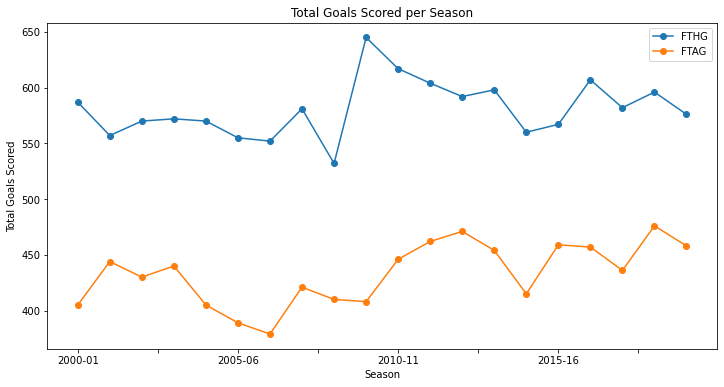

In [416]:
home_season_goals = []
away_season_goals = []

for season in season_list:
    home_season_goals.append(main_dict[season].FTHG.sum())
    away_season_goals.append(main_dict[season].FTAG.sum())

goals_df = pd.DataFrame(list(zip(season_list,home_season_goals,away_season_goals)), columns=["Season","FTHG", "FTAG"])     
goals_df.plot(x="Season", figsize=(12,6), marker='o')
plt.title("Total Goals Scored per Season")
plt.ylabel('Total Goals Scored')

Text(0, 0.5, 'Average Goals')

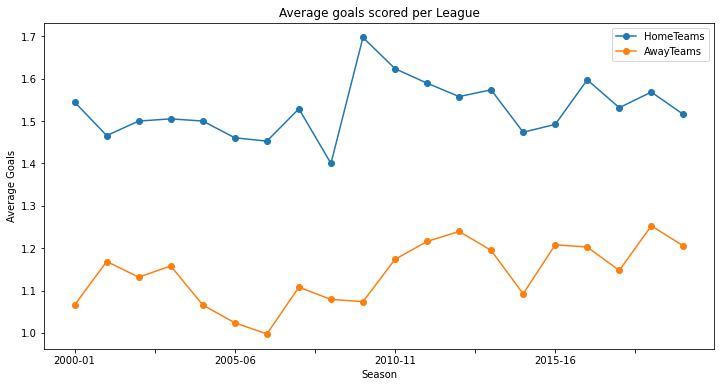

In [417]:
home_season_goals = []
away_season_goals = []

for season in season_list:
    home_season_goals.append(main_dict[season].FTHG.mean())
    away_season_goals.append(main_dict[season].FTAG.mean())

goals_df = pd.DataFrame(list(zip(season_list,home_season_goals,away_season_goals)), columns=["Season","HomeTeams", "AwayTeams"])     
goals_df.plot(x="Season", figsize=(12,6), marker="o")
plt.title("Average goals scored per League")
plt.ylabel('Average Goals')

Text(0, 0.5, 'Total Shots on Target')

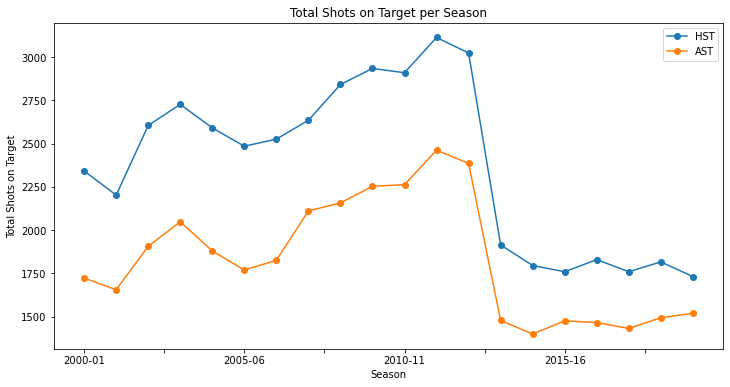

In [418]:
home_season_goals = []
away_season_goals = []

for season in season_list:
    home_season_goals.append(main_dict[season].HST.sum())
    away_season_goals.append(main_dict[season].AST.sum())

goals_df = pd.DataFrame(list(zip(season_list,home_season_goals,away_season_goals)), columns=["Season","HST", "AST"])     
goals_df.plot(x="Season", figsize=(12,6), marker='o')
plt.title("Total Shots on Target per Season")
plt.ylabel('Total Shots on Target')

Text(0, 0.5, 'Total Goals Difference')

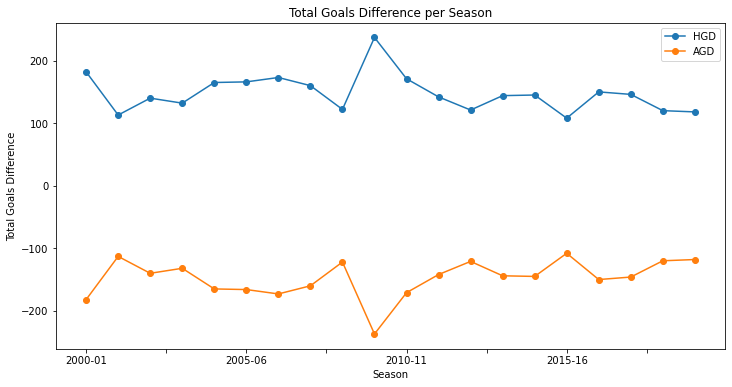

In [419]:
home_season_goals = []
away_season_goals = []

for season in season_list:
    home_season_goals.append(main_dict[season].HGD.sum())
    away_season_goals.append(main_dict[season].AGD.sum())

goals_df = pd.DataFrame(list(zip(season_list,home_season_goals,away_season_goals)), columns=["Season","HGD", "AGD"])     
goals_df.plot(x="Season", figsize=(12,6), marker='o')
plt.title("Total Goals Difference per Season")
plt.ylabel('Total Goals Difference')

#### Data Describe and Exploration

In [420]:
rows, col = df.shape
home_wins, col = df[df['FTR'] == 'H'].shape
away_wins, col = df[df['FTR'] == 'A'].shape
draws, col = df[df['FTR'] == 'D'].shape

print("Total number of matches in the dataset ->", rows)
print("Total number of games won whilst at Home ->", home_wins)
print("Total number of games won whilst at Away ->", away_wins)
print("Total number of draws ->", draws)
print("Win rate for Home Team -> {:.4f}%".format((home_wins/rows)*100))
print("Win rate for Away Team -> {:.4f}%".format((away_wins/rows)*100))
print("Draw rate -> {:.4f}%".format((draws/rows)*100))

df.describe()

Total number of matches in the dataset -> 7600
Total number of games won whilst at Home -> 3529
Total number of games won whilst at Away -> 2157
Total number of draws -> 1914
Win rate for Home Team -> 46.4342%
Win rate for Away Team -> 28.3816%
Draw rate -> 25.1842%


,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,HGD,AGD
count,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000
mean,1.528947,1.140132,0.682500,0.498947,13.525000,10.566842,6.255395,4.828158,6.129211,4.787632,11.436184,12.003816,1.403816,1.760395,0.064079,0.091447,0.388816,-0.388816
std,1.296113,1.131548,0.831894,0.714742,5.231667,4.529502,3.351286,2.815406,3.100482,2.730690,3.803660,3.964524,1.187938,1.272291,0.256459,0.299898,1.779977,1.779977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-8.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000,8.000000,9.000000


#### Calculating the total number of goals per team based on Home/Away Turf

In [421]:
def calculate_total_goals_per_team(dataframe, turf_type):
    if turf_type.lower() == "home":
        team_lst = dataframe['HomeTeam'].unique()
        turf = "HomeTeam"
    if turf_type.lower() == "away":
        team_lst = dataframe['AwayTeam'].unique()
        turf = "AwayTeam"
    
    total_goals_per_team = {}
    for team in team_lst:
        curr_team_df = dataframe[dataframe[turf] == team]
        total_goals_per_team[team] = curr_team_df.FTHG.sum()
    return total_goals_per_team  

In [422]:
total_goals_per_team = {}
home_turf_total_goals = calculate_total_goals_per_team(df, "Home")
home_turf_total_goals_df = pd.DataFrame.from_dict(home_turf_total_goals, orient="index", columns=["Total Goals"])
home_turf_total_goals_df

,Total Goals
Charlton,179
Chelsea,804
Coventry,14
Derby,55
Leeds,117
Leicester,240
Liverpool,768
Sunderland,288
Tottenham,685
Man United,804


Text(0, 0.5, 'Total Goals Scored')

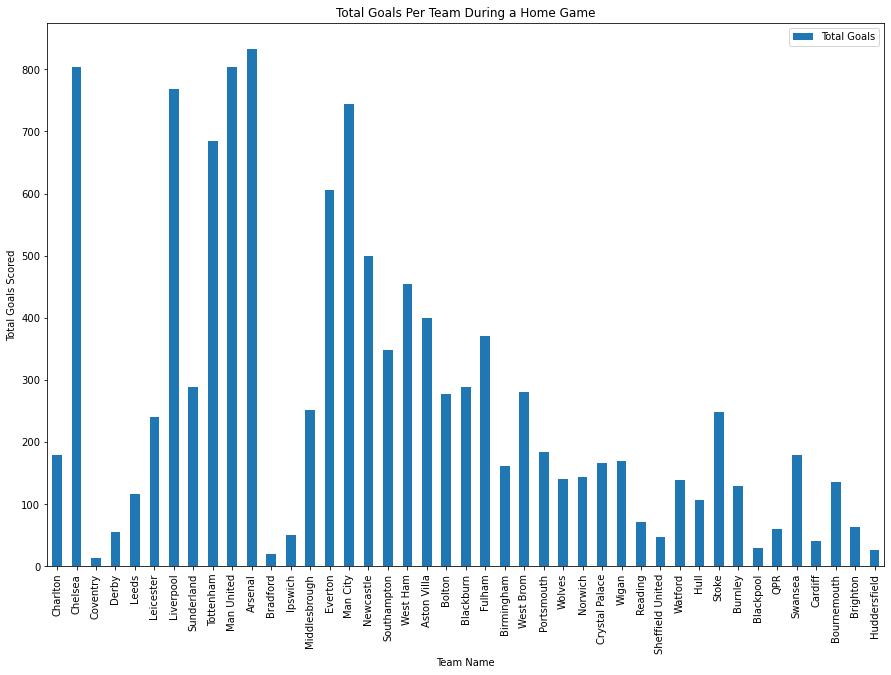

In [423]:
home_turf_total_goals_df.plot.bar(figsize=(15,10))
plt.title("Total Goals Per Team During a Home Game")
plt.xlabel("Team Name")
plt.ylabel('Total Goals Scored')

In [424]:
away_turf_total_goals = calculate_total_goals_per_team(df, "Away")
away_turf_total_goals_df = pd.DataFrame.from_dict(away_turf_total_goals, orient="index", columns=["Total Goals"])
away_turf_total_goals_df

,Total Goals
Man City,456
West Ham,538
Middlesbrough,271
Southampton,367
Everton,539
Aston Villa,538
Bradford,41
Arsenal,460
Ipswich,67
Newcastle,573


Text(0, 0.5, 'Total Goals Scored')

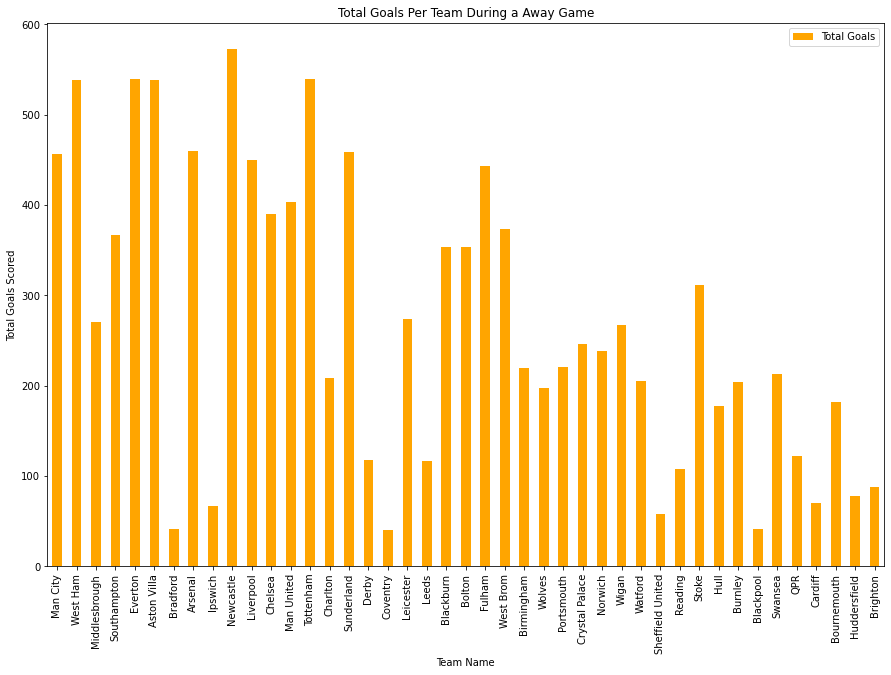

In [425]:
away_turf_total_goals_df.plot.bar(figsize=(15,10), color="orange", label="Total Goals")
plt.title("Total Goals Per Team During a Away Game")
plt.xlabel("Team Name")
plt.ylabel('Total Goals Scored')

##### Prototype ML

In [426]:
training_df = pd.concat([main_dict['2015-16'],main_dict['2000-01']])
team_lst = training_df['HomeTeam'].unique()

total_goals = training_df.FTHG.sum()

training_df

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HF,AF,HY,AY,HR,AR,HGD,AGD
5700,2015-16,8/8/2015 0:00,Bournemouth,Aston Villa,0,1,A,0,0,D,...,6,3,13,13,3,4,0,0,-1,1
5701,2015-16,8/8/2015 0:00,Chelsea,Swansea,2,2,D,2,1,H,...,4,8,15,16,1,3,1,0,0,0
5702,2015-16,8/8/2015 0:00,Everton,Watford,2,2,D,0,1,A,...,8,2,7,13,1,2,0,0,0,0
5703,2015-16,8/8/2015 0:00,Leicester,Sunderland,4,2,H,3,0,H,...,6,3,13,17,2,4,0,0,2,-2
5704,2015-16,8/8/2015 0:00,Man United,Tottenham,1,0,H,1,0,H,...,1,2,12,12,2,3,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2000-01,5/19/2001 0:00,Man City,Chelsea,1,2,A,1,1,D,...,8,7,22,18,4,2,0,0,-1,1
376,2000-01,5/19/2001 0:00,Middlesbrough,West Ham,2,1,H,2,1,H,...,5,6,13,15,0,0,0,0,1,-1
377,2000-01,5/19/2001 0:00,Newcastle,Aston Villa,3,0,H,2,0,H,...,5,1,10,14,0,5,1,1,3,-3
378,2000-01,5/19/2001 0:00,Southampton,Arsenal,3,2,H,0,1,A,...,7,5,17,10,1,2,0,0,1,-1


In [427]:
test1 = main_dict['2017-18']
test_team_lst = test1['HomeTeam'].unique()
test_total_goals = test1.FTHG.sum()
test1

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HF,AF,HY,AY,HR,AR,HGD,AGD
6460,2017-18,8/11/2017 0:00,Arsenal,Leicester,4,3,H,2,2,D,...,9,4,9,12,0,1,0,0,1,-1
6461,2017-18,8/12/2017 0:00,Brighton,Man City,0,2,A,0,0,D,...,3,10,6,9,0,2,0,0,-2,2
6462,2017-18,8/12/2017 0:00,Chelsea,Burnley,2,3,A,0,3,A,...,8,5,16,11,3,3,2,0,-1,1
6463,2017-18,8/12/2017 0:00,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,12,9,7,19,1,3,0,0,-3,3
6464,2017-18,8/12/2017 0:00,Everton,Stoke,1,0,H,1,0,H,...,6,7,13,10,1,1,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,2017-18,5/13/2018 0:00,Newcastle,Chelsea,3,0,H,1,0,H,...,4,2,11,10,0,1,0,0,3,-3
6836,2017-18,5/13/2018 0:00,Southampton,Man City,0,1,A,0,0,D,...,1,12,8,10,3,1,0,0,-1,1
6837,2017-18,5/13/2018 0:00,Swansea,Stoke,1,2,A,1,2,A,...,6,0,12,9,1,2,0,0,-1,1
6838,2017-18,5/13/2018 0:00,Tottenham,Leicester,5,4,H,1,2,A,...,4,4,9,13,1,2,0,0,1,-1


In [428]:
def calculate_attack_strength_per_team(dataframe):
    rows, col = dataframe.shape
    team_lst = dataframe['HomeTeam'].unique()
    total_goals = dataframe.FTHG.sum()
    
    total_goals_per_team = {}
    for team in team_lst:
        curr_team_df = dataframe[dataframe['HomeTeam'] == team]
        total_goals_per_team[team] = curr_team_df.FTHG.mean() / (total_goals/rows)
    return total_goals_per_team

att_dict = calculate_attack_strength_per_team(training_df)
att_dict

{'Bournemouth': 0.7972270363951474,
 'Chelsea': 1.317157712305026,
 'Everton': 1.1091854419410745,
 'Leicester': 1.0918544194107453,
 'Man United': 1.317157712305026,
 'Norwich': 0.9012131715771231,
 'Arsenal': 1.317157712305026,
 'Newcastle': 1.005199306759099,
 'Stoke': 0.7625649913344887,
 'West Brom': 0.6932409012131716,
 'Aston Villa': 0.7105719237435009,
 'Southampton': 1.1438474870017332,
 'Sunderland': 0.8145580589254767,
 'Swansea': 0.6932409012131716,
 'Tottenham': 1.1438474870017332,
 'Watford': 0.6932409012131716,
 'West Ham': 1.005199306759099,
 'Crystal Palace': 0.658578856152513,
 'Man City': 1.1611785095320624,
 'Liverpool': 1.2651646447140381,
 'Charlton': 1.074523396880416,
 'Coventry': 0.4852686308492201,
 'Derby': 0.7972270363951474,
 'Leeds': 1.2478336221837087,
 'Bradford': 0.6932409012131716,
 'Ipswich': 1.074523396880416,
 'Middlesbrough': 0.6239168110918544}

In [429]:
att_dict_test = calculate_attack_strength_per_team(test1)
att_dict_test

{'Arsenal': 1.8556701030927834,
 'Brighton': 0.8247422680412371,
 'Chelsea': 1.0309278350515463,
 'Crystal Palace': 0.9965635738831615,
 'Everton': 0.9621993127147765,
 'Southampton': 0.6872852233676975,
 'Watford': 0.9278350515463917,
 'West Brom': 0.7216494845360825,
 'Man United': 1.3058419243986255,
 'Newcastle': 0.7216494845360825,
 'Bournemouth': 0.8934707903780068,
 'Burnley': 0.549828178694158,
 'Leicester': 0.859106529209622,
 'Liverpool': 1.5463917525773194,
 'Stoke': 0.6872852233676975,
 'Swansea': 0.5841924398625429,
 'Huddersfield': 0.549828178694158,
 'Tottenham': 1.374570446735395,
 'Man City': 2.0962199312714778,
 'West Ham': 0.8247422680412371}

In [430]:
def calculate_defence_strength(dataframe):
    rows, col = dataframe.shape
    team_lst = dataframe['HomeTeam'].unique()
    total_goals = dataframe.FTAG.sum()
    
    total_goals_per_team = {}
    for team in team_lst:
        curr_team_df = dataframe[dataframe['HomeTeam'] == team]
        total_goals_per_team[team] = curr_team_df.FTAG.mean() / (total_goals/rows)
    return total_goals_per_team

In [431]:
def_dict = calculate_defence_strength(training_df)
def_dict

{'Bournemouth': 1.5740740740740742,
 'Chelsea': 1.1574074074074074,
 'Everton': 1.3194444444444444,
 'Leicester': 0.9490740740740741,
 'Man United': 0.48611111111111116,
 'Norwich': 1.3888888888888888,
 'Arsenal': 0.5555555555555556,
 'Newcastle': 0.9490740740740741,
 'Stoke': 1.1111111111111112,
 'West Brom': 1.2037037037037037,
 'Aston Villa': 1.2731481481481481,
 'Southampton': 1.0185185185185186,
 'Sunderland': 0.8333333333333333,
 'Swansea': 0.9259259259259259,
 'Tottenham': 0.7175925925925926,
 'Watford': 0.8796296296296297,
 'West Ham': 1.0648148148148149,
 'Crystal Palace': 1.0648148148148149,
 'Man City': 1.2037037037037037,
 'Liverpool': 0.8333333333333333,
 'Charlton': 0.8796296296296297,
 'Coventry': 1.0648148148148149,
 'Derby': 1.1111111111111112,
 'Leeds': 0.9722222222222223,
 'Bradford': 1.3425925925925928,
 'Ipswich': 0.6944444444444444,
 'Middlesbrough': 1.0648148148148149}

In [432]:
def_dict_test = calculate_defence_strength(test1)
def_dict_test

{'Arsenal': 0.9174311926605504,
 'Brighton': 1.146788990825688,
 'Chelsea': 0.7339449541284403,
 'Crystal Palace': 1.238532110091743,
 'Everton': 1.0091743119266054,
 'Southampton': 1.1926605504587156,
 'Watford': 1.4220183486238531,
 'West Brom': 1.3302752293577982,
 'Man United': 0.4128440366972477,
 'Newcastle': 0.7798165137614679,
 'Bournemouth': 1.3761467889908257,
 'Burnley': 0.7798165137614679,
 'Leicester': 1.0091743119266054,
 'Liverpool': 0.4587155963302752,
 'Stoke': 1.3761467889908257,
 'Swansea': 1.1009174311926604,
 'Huddersfield': 1.146788990825688,
 'Tottenham': 0.7339449541284403,
 'Man City': 0.6422018348623852,
 'West Ham': 1.1926605504587156}

In [433]:
training_df = training_df.reindex(columns = training_df.columns.tolist() + ['AttackingStrength','DefenceStrength'])
training_df

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HY,AY,HR,AR,HGD,AGD,AttackingStrength,DefenceStrength
5700,2015-16,8/8/2015 0:00,Bournemouth,Aston Villa,0,1,A,0,0,D,...,13,13,3,4,0,0,-1,1,NaN,NaN
5701,2015-16,8/8/2015 0:00,Chelsea,Swansea,2,2,D,2,1,H,...,15,16,1,3,1,0,0,0,NaN,NaN
5702,2015-16,8/8/2015 0:00,Everton,Watford,2,2,D,0,1,A,...,7,13,1,2,0,0,0,0,NaN,NaN
5703,2015-16,8/8/2015 0:00,Leicester,Sunderland,4,2,H,3,0,H,...,13,17,2,4,0,0,2,-2,NaN,NaN
5704,2015-16,8/8/2015 0:00,Man United,Tottenham,1,0,H,1,0,H,...,12,12,2,3,0,0,1,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2000-01,5/19/2001 0:00,Man City,Chelsea,1,2,A,1,1,D,...,22,18,4,2,0,0,-1,1,NaN,NaN
376,2000-01,5/19/2001 0:00,Middlesbrough,West Ham,2,1,H,2,1,H,...,13,15,0,0,0,0,1,-1,NaN,NaN
377,2000-01,5/19/2001 0:00,Newcastle,Aston Villa,3,0,H,2,0,H,...,10,14,0,5,1,1,3,-3,NaN,NaN
378,2000-01,5/19/2001 0:00,Southampton,Arsenal,3,2,H,0,1,A,...,17,10,1,2,0,0,1,-1,NaN,NaN


In [434]:
test1 = test1.reindex(columns = test1.columns.tolist() + ['AttackingStrength','DefenceStrength'])
test1

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HY,AY,HR,AR,HGD,AGD,AttackingStrength,DefenceStrength
6460,2017-18,8/11/2017 0:00,Arsenal,Leicester,4,3,H,2,2,D,...,9,12,0,1,0,0,1,-1,NaN,NaN
6461,2017-18,8/12/2017 0:00,Brighton,Man City,0,2,A,0,0,D,...,6,9,0,2,0,0,-2,2,NaN,NaN
6462,2017-18,8/12/2017 0:00,Chelsea,Burnley,2,3,A,0,3,A,...,16,11,3,3,2,0,-1,1,NaN,NaN
6463,2017-18,8/12/2017 0:00,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,7,19,1,3,0,0,-3,3,NaN,NaN
6464,2017-18,8/12/2017 0:00,Everton,Stoke,1,0,H,1,0,H,...,13,10,1,1,0,0,1,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,2017-18,5/13/2018 0:00,Newcastle,Chelsea,3,0,H,1,0,H,...,11,10,0,1,0,0,3,-3,NaN,NaN
6836,2017-18,5/13/2018 0:00,Southampton,Man City,0,1,A,0,0,D,...,8,10,3,1,0,0,-1,1,NaN,NaN
6837,2017-18,5/13/2018 0:00,Swansea,Stoke,1,2,A,1,2,A,...,12,9,1,2,0,0,-1,1,NaN,NaN
6838,2017-18,5/13/2018 0:00,Tottenham,Leicester,5,4,H,1,2,A,...,9,13,1,2,0,0,1,-1,NaN,NaN


In [435]:
def insert_strength(dataframe, att_dict1, def_dict1, team_list):
    for index, rows in dataframe.iterrows():
        for team in team_list:
            try:
                if dataframe['HomeTeam'][index] == team:
                        dataframe["AttackingStrength"][index] = att_dict1[team]
                elif dataframe['AwayTeam'][index] == team:
                    dataframe["DefenceStrength"][index] = def_dict1[team]
            except:
                print("Team Relegated Last Season")
    return dataframe
training_df

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HY,AY,HR,AR,HGD,AGD,AttackingStrength,DefenceStrength
5700,2015-16,8/8/2015 0:00,Bournemouth,Aston Villa,0,1,A,0,0,D,...,13,13,3,4,0,0,-1,1,NaN,NaN
5701,2015-16,8/8/2015 0:00,Chelsea,Swansea,2,2,D,2,1,H,...,15,16,1,3,1,0,0,0,NaN,NaN
5702,2015-16,8/8/2015 0:00,Everton,Watford,2,2,D,0,1,A,...,7,13,1,2,0,0,0,0,NaN,NaN
5703,2015-16,8/8/2015 0:00,Leicester,Sunderland,4,2,H,3,0,H,...,13,17,2,4,0,0,2,-2,NaN,NaN
5704,2015-16,8/8/2015 0:00,Man United,Tottenham,1,0,H,1,0,H,...,12,12,2,3,0,0,1,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2000-01,5/19/2001 0:00,Man City,Chelsea,1,2,A,1,1,D,...,22,18,4,2,0,0,-1,1,NaN,NaN
376,2000-01,5/19/2001 0:00,Middlesbrough,West Ham,2,1,H,2,1,H,...,13,15,0,0,0,0,1,-1,NaN,NaN
377,2000-01,5/19/2001 0:00,Newcastle,Aston Villa,3,0,H,2,0,H,...,10,14,0,5,1,1,3,-3,NaN,NaN
378,2000-01,5/19/2001 0:00,Southampton,Arsenal,3,2,H,0,1,A,...,17,10,1,2,0,0,1,-1,NaN,NaN


In [436]:
training_df_new = insert_strength(training_df, att_dict, def_dict, team_lst)
training_df_new

<ipython-input-435-9371bfbb4bc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["AttackingStrength"][index] = att_dict1[team]
<ipython-input-435-9371bfbb4bc1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["DefenceStrength"][index] = def_dict1[team]


,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HY,AY,HR,AR,HGD,AGD,AttackingStrength,DefenceStrength
5700,2015-16,8/8/2015 0:00,Bournemouth,Aston Villa,0,1,A,0,0,D,...,13,13,3,4,0,0,-1,1,0.797227,1.273148
5701,2015-16,8/8/2015 0:00,Chelsea,Swansea,2,2,D,2,1,H,...,15,16,1,3,1,0,0,0,1.317158,0.925926
5702,2015-16,8/8/2015 0:00,Everton,Watford,2,2,D,0,1,A,...,7,13,1,2,0,0,0,0,1.109185,0.879630
5703,2015-16,8/8/2015 0:00,Leicester,Sunderland,4,2,H,3,0,H,...,13,17,2,4,0,0,2,-2,1.091854,0.833333
5704,2015-16,8/8/2015 0:00,Man United,Tottenham,1,0,H,1,0,H,...,12,12,2,3,0,0,1,-1,1.317158,0.717593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2000-01,5/19/2001 0:00,Man City,Chelsea,1,2,A,1,1,D,...,22,18,4,2,0,0,-1,1,1.161179,1.157407
376,2000-01,5/19/2001 0:00,Middlesbrough,West Ham,2,1,H,2,1,H,...,13,15,0,0,0,0,1,-1,0.623917,1.064815
377,2000-01,5/19/2001 0:00,Newcastle,Aston Villa,3,0,H,2,0,H,...,10,14,0,5,1,1,3,-3,1.005199,1.273148
378,2000-01,5/19/2001 0:00,Southampton,Arsenal,3,2,H,0,1,A,...,17,10,1,2,0,0,1,-1,1.143847,0.555556


In [437]:
test1_new = insert_strength(test1, att_dict_test, def_dict_test, test_team_lst)
test1_new

<ipython-input-435-9371bfbb4bc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["AttackingStrength"][index] = att_dict1[team]
<ipython-input-435-9371bfbb4bc1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["DefenceStrength"][index] = def_dict1[team]


,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HY,AY,HR,AR,HGD,AGD,AttackingStrength,DefenceStrength
6460,2017-18,8/11/2017 0:00,Arsenal,Leicester,4,3,H,2,2,D,...,9,12,0,1,0,0,1,-1,1.855670,1.009174
6461,2017-18,8/12/2017 0:00,Brighton,Man City,0,2,A,0,0,D,...,6,9,0,2,0,0,-2,2,0.824742,0.642202
6462,2017-18,8/12/2017 0:00,Chelsea,Burnley,2,3,A,0,3,A,...,16,11,3,3,2,0,-1,1,1.030928,0.779817
6463,2017-18,8/12/2017 0:00,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,7,19,1,3,0,0,-3,3,0.996564,1.146789
6464,2017-18,8/12/2017 0:00,Everton,Stoke,1,0,H,1,0,H,...,13,10,1,1,0,0,1,-1,0.962199,1.376147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,2017-18,5/13/2018 0:00,Newcastle,Chelsea,3,0,H,1,0,H,...,11,10,0,1,0,0,3,-3,0.721649,0.733945
6836,2017-18,5/13/2018 0:00,Southampton,Man City,0,1,A,0,0,D,...,8,10,3,1,0,0,-1,1,0.687285,0.642202
6837,2017-18,5/13/2018 0:00,Swansea,Stoke,1,2,A,1,2,A,...,12,9,1,2,0,0,-1,1,0.584192,1.376147
6838,2017-18,5/13/2018 0:00,Tottenham,Leicester,5,4,H,1,2,A,...,9,13,1,2,0,0,1,-1,1.374570,1.009174


In [438]:
data = training_df_new.drop(['FTR', 'Referee', 'HTR', 'HomeTeam', 'AwayTeam', 'Season', 'Date'], axis=1)
targets = training_df_new.FTR


x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25, random_state=42)
y_test

15      H
6024    A
5797    D
117     A
5809    H
       ..
5918    D
5845    A
102     H
285     H
5832    H
Name: FTR, Length: 190, dtype: object

In [439]:
y_test_new = test1_new.FTR

In [440]:
def training_dataset(classifier, x_train, y_train):
    classifier.fit(x_train, y_train)

In [441]:
lr_model = LogisticRegression(max_iter=10000)
training_dataset(lr_model, x_train, y_train)

In [442]:
prediction = lr_model.predict(x_test)
prediction

array(['H', 'A', 'D', 'A', 'H', 'D', 'A', 'D', 'D', 'H', 'D', 'H', 'A',
       'D', 'D', 'D', 'H', 'H', 'H', 'A', 'D', 'H', 'H', 'D', 'D', 'H',
       'H', 'H', 'D', 'H', 'H', 'H', 'D', 'A', 'H', 'D', 'H', 'H', 'H',
       'D', 'A', 'H', 'H', 'H', 'H', 'A', 'H', 'H', 'A', 'D', 'A', 'D',
       'H', 'D', 'H', 'A', 'A', 'D', 'H', 'D', 'H', 'A', 'H', 'D', 'A',
       'H', 'H', 'H', 'A', 'A', 'A', 'H', 'H', 'D', 'D', 'A', 'H', 'H',
       'H', 'D', 'A', 'H', 'A', 'A', 'A', 'H', 'D', 'D', 'D', 'H', 'H',
       'A', 'H', 'D', 'H', 'D', 'A', 'D', 'H', 'H', 'H', 'H', 'H', 'H',
       'A', 'H', 'D', 'H', 'D', 'H', 'D', 'A', 'A', 'A', 'H', 'H', 'H',
       'H', 'A', 'A', 'D', 'H', 'D', 'A', 'D', 'D', 'D', 'H', 'D', 'D',
       'H', 'D', 'D', 'H', 'A', 'H', 'H', 'D', 'A', 'D', 'H', 'H', 'H',
       'A', 'A', 'A', 'A', 'A', 'D', 'H', 'H', 'A', 'D', 'H', 'H', 'H',
       'H', 'H', 'A', 'A', 'A', 'D', 'H', 'A', 'A', 'D', 'A', 'H', 'H',
       'H', 'A', 'A', 'A', 'D', 'D', 'D', 'H', 'H', 'H', 'H', 'H

(3, 3)


,0,1,2
0,51,0,0
1,0,53,0
2,0,0,86


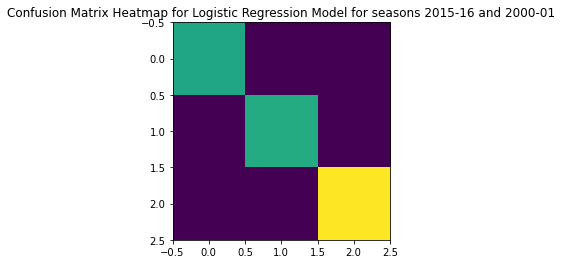

In [458]:
c_m = confusion_matrix(y_test,prediction)
print(c_m.shape)
df = pd.DataFrame(c_m)
plt.imshow(df)
plt.title("Confusion Matrix Heatmap for Logistic Regression Model for seasons 2015-16 and 2000-01")
df

In [463]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        51
           D       1.00      1.00      1.00        53
           H       1.00      1.00      1.00        86

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



In [459]:
svm_c_m = SVC()

training_dataset(svm_c_m, x_train, y_train)

svm_prediction = svm_c_m.predict(x_test)
svm_prediction

array(['H', 'A', 'D', 'D', 'H', 'D', 'A', 'D', 'D', 'H', 'D', 'H', 'A',
       'D', 'D', 'D', 'H', 'H', 'H', 'A', 'D', 'H', 'H', 'D', 'D', 'H',
       'H', 'H', 'D', 'H', 'H', 'H', 'D', 'A', 'D', 'D', 'H', 'H', 'H',
       'D', 'A', 'H', 'H', 'H', 'H', 'A', 'H', 'H', 'A', 'D', 'A', 'D',
       'H', 'D', 'H', 'A', 'D', 'D', 'H', 'D', 'H', 'A', 'H', 'D', 'A',
       'H', 'H', 'H', 'D', 'A', 'A', 'H', 'H', 'D', 'D', 'A', 'H', 'H',
       'H', 'D', 'D', 'H', 'A', 'A', 'A', 'H', 'D', 'D', 'D', 'H', 'H',
       'A', 'H', 'D', 'H', 'D', 'A', 'D', 'H', 'H', 'H', 'H', 'H', 'H',
       'D', 'H', 'D', 'H', 'D', 'H', 'D', 'D', 'A', 'A', 'H', 'H', 'H',
       'D', 'A', 'A', 'D', 'H', 'H', 'D', 'D', 'D', 'D', 'H', 'D', 'D',
       'H', 'D', 'D', 'D', 'A', 'H', 'H', 'D', 'A', 'D', 'H', 'H', 'H',
       'A', 'A', 'A', 'A', 'A', 'D', 'H', 'H', 'A', 'D', 'D', 'H', 'H',
       'H', 'H', 'D', 'A', 'A', 'D', 'H', 'A', 'A', 'D', 'A', 'H', 'H',
       'H', 'D', 'A', 'A', 'D', 'H', 'D', 'H', 'H', 'H', 'H', 'H

,0,1,2
0,42,9,0
1,0,51,2
2,0,4,82


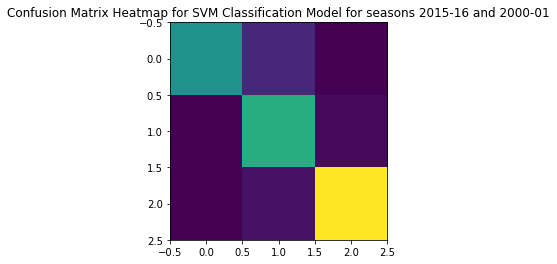

In [460]:
svm_c_m = confusion_matrix(y_test, svm_prediction)
df = pd.DataFrame(svm_c_m)
plt.imshow(df)
plt.title("Confusion Matrix Heatmap for SVM Classification Model for seasons 2015-16 and 2000-01")
df

In [461]:
print(classification_report(y_test, svm_prediction))

              precision    recall  f1-score   support

           A       1.00      0.82      0.90        51
           D       0.80      0.96      0.87        53
           H       0.98      0.95      0.96        86

    accuracy                           0.92       190
   macro avg       0.92      0.91      0.91       190
weighted avg       0.93      0.92      0.92       190



In [457]:
# data = test1_new.drop(['FTR', 'Referee', 'HTR', 'HomeTeam', 'AwayTeam', 'Season', 'Date'], axis=1)
# svm_prediction = svm_c_m.predict(data)
# svm_c_m = confusion_matrix(y_test_new, svm_prediction)
# svm_prediction